In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the graphs as interactive.
%matplotlib inline

## Importing Dataset

In [2]:
accidents_2019 = pd.read_csv('../data/2019_accidents_causes_gu_bcn_.csv')
accidents_2018 = pd.read_csv('../data/2018_accidents_causes_gu_bcn_.csv')
accidents_2017 = pd.read_csv('../data/2017_accidents_causes_gu_bcn_.csv')
accidents_2016 = pd.read_csv('../data/2016_accidents_causes_gu_bcn_.csv')


In [3]:
accidents = pd.concat([accidents_2019, accidents_2017,accidents_2018,accidents_2016], axis = 0)

In [4]:
accidents.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia',
       'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_torn', 'Descripcio_causa_mediata', 'Coordenada_UTM_X',
       'Coordenada_UTM_Y', 'Longitud', 'Latitud', 'Número_d'expedient',
       'Descripció_dia_setmana', 'Descripció_tipus_dia', 'NK Any',
       'Mes_de_any', 'Dia_de_mes', 'Hora_de_dia', 'Descripció_torn',
       'Descripció_causa_mediata', 'Coordenada_UTM_(X)', 'Coordenada_UTM_(Y)',
       'Any', 'Num_postal'],
      dtype='object')

In [5]:
accidents.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,NK Any,Mes_de_any,Dia_de_mes,Hora_de_dia,Descripció_torn,Descripció_causa_mediata,Coordenada_UTM_(X),Coordenada_UTM_(Y),Any,Num_postal
0,2019S001972,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dimecres,Dc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019S002789,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dimarts,Dm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019S008204,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dimecres,Dc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019S009935,-1,Desconegut,-1,Desconegut,-1,Desconegut,Desconegut,Dimarts,Dm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019S006753,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,Meridiana,0163 0163,Dissabte,Ds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping useless columns and NaN

In [6]:
accidents.isnull().sum()

Numero_expedient            10343
Codi_districte                  0
Nom_districte                   0
Codi_barri                      0
Nom_barri                       0
Codi_carrer                     0
Nom_carrer                      0
Num_postal                  14951
Descripcio_dia_setmana      10343
Dia_setmana                     0
Descripcio_tipus_dia        10343
NK_Any                      30426
Mes_any                     10343
Nom_mes                         0
Dia_mes                     10343
Hora_dia                    10343
Descripcio_torn             10343
Descripcio_causa_mediata    10343
Coordenada_UTM_X            10343
Coordenada_UTM_Y            10343
Longitud                        0
Latitud                         0
Número_d'expedient          30111
Descripció_dia_setmana      30111
Descripció_tipus_dia        30111
NK Any                      30111
Mes_de_any                  30111
Dia_de_mes                  30111
Hora_de_dia                 30111
Descripció_tor

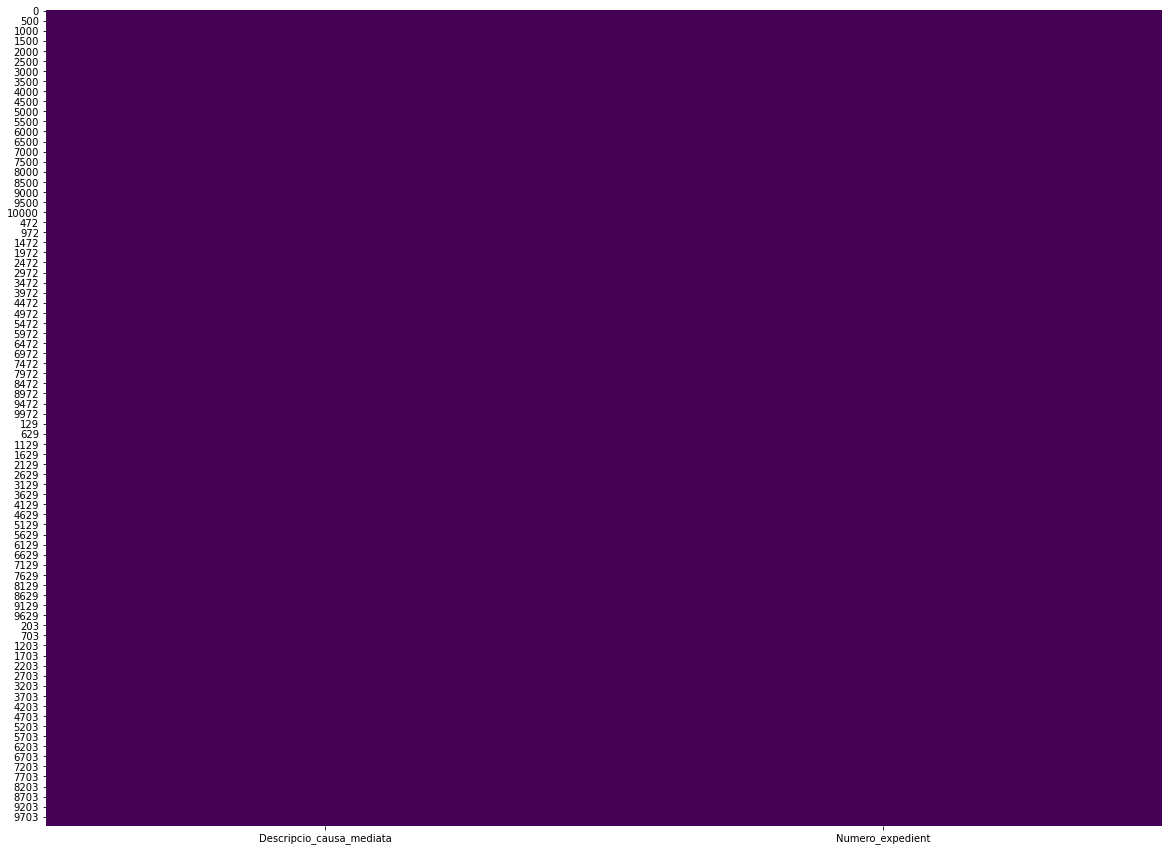

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(accidents.isnull(), cbar = False, cmap = 'viridis')

In [16]:
# In proportion of the dataset, the missing values are a logical explanation.
#1. Columns Numero_Expedient + 'Numero_expedient' need to be concated, they're splittes by 2019 year csv due to variable name 
#2. We only need the Expedient accident number as ID to concatenate in the future and the important featuresthat i will choose in the next cell

In [8]:
accidents = pd.DataFrame(data=accidents, columns=['Descripció_causa_mediata','Descripcio_causa_mediata',"Número_d'expedient",'Numero_expedient'])
#Please, come back to run

In [10]:
accidents['Numero_expedient'] = accidents['Numero_expedient'].fillna(accidents["Número_d'expedient"]) 
accidents['Descripcio_causa_mediata'] = accidents['Descripcio_causa_mediata'].fillna(accidents["Descripció_causa_mediata"])

In [11]:
accidents.drop(columns = ["Número_d'expedient","Descripció_causa_mediata"],axis=1,inplace=True) #we eliminate this column because we have all distirbuted in column 'Any' as we did in the before cells. Codi_barri is a column irrelevant for us.

In [13]:
accidents.Descripcio_causa_mediata.value_counts()

No hi ha causa mediata             38103
Alcoholèmia                         1650
Calçada en mal estat                 293
Excés de velocitat o inadequada      251
Drogues o medicaments                 94
Objectes o animals a la calçada       32
Factors meteorològics                 19
Estat de la senyalització             12
Name: Descripcio_causa_mediata, dtype: int64

In [15]:
accidents.to_csv('../data/accidents_bcn_causa_cleaned.csv', index=False)